# 1.MORO OPTIMIZATION

## Searching for candidate solutions
Set up the robust optimization problem using the robustness functions you have specified. Assume that you will need 50 for estimating the robustness. Use $\epsilon$-progress and hypervolume to track convergence. Solve the optimization problem. As $\epsilon$ values, you can assume 0.05 for each of the four robustness metrics.

*note: this optimization problem is computationally very expensive. Develop and test your code using a sequential evaluator, a low number of function evaluations (e.g., 200), and a low number of scenarios (e.g., 5). Once everything seems to be working replace the sequential evaluator with an multiprocessing or ipyparallel evaluator, and increase the number of nfe and scenarios*.


# 1.1 Generate random policies

In [20]:
#pip install git+https://github.com/quaquel/EMAworkbench #if you haven't run it already...

In [21]:
n_scenarios = 2 # 10 # assumption made from lab 10

In [22]:
import functools
import pandas as pd

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'

Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1000) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Dike_Investment_Costs = functools.partial(robustness, SMALLER, 1000)
RfR_Investment_Costs = functools.partial(robustness, SMALLER, 1000)
Evacuation_Costs = functools.partial(robustness, SMALLER, 1000)
Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.000001) #not ok

In [ ]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'

Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1000) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Dike_Investment_Costs = functools.partial(robustness, SMALLER, 1000)
RfR_Investment_Costs = functools.partial(robustness, SMALLER, 1000)
Evacuation_Costs = functools.partial(robustness, SMALLER, 1000)
Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.000001) #not ok

In [ ]:
from problem_formulation import get_model_for_problem_formulation

model, planning_steps = get_model_for_problem_formulation(2)
n_objectives = 3

In [ ]:
from ema_workbench import ema_logging, MultiprocessingEvaluator
from ema_workbench import Samplers
import numpy as np
ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenarios,               #500
                                            policies=4,
                                            uncertainty_sampling= Samplers.MC) #monty (python) carlo

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(8,8),
                        sharex=True)
axes = [axes[0,0],axes[0,1],axes[1,0],axes[1,1]]                             #axes[1,1]

robustness_funcs = {"Expected Annual Damage": Expected_Annual_Damage,
                    "Dike Investment Costs": Dike_Investment_Costs,
                    "RfR Investment Costs": RfR_Investment_Costs,
                    "Evacuation Costs": Evacuation_Costs,
                    "Expected Number of Deaths": Expected_Number_of_Deaths}

experiments, outcomes = results

for ax, (outcome, value) in zip(axes, outcomes.items()):
    for policy in np.unique(experiments['policy']):
        logical = experiments['policy'] == policy
        data = value[logical]
        
        robustness = []
      
        for i in range(1, data.shape[0]):
            robustness.append(robustness_funcs[outcome](data[0:i]))
        ax.plot(robustness, label=policy)
    ax.set_xlabel("# experiments")
    ax.set_ylabel(outcome)

# 1.2 Search for candidate solutions

the fundamental problem is fine tuning the robustness functions. To do this, rather than run optimizaitons many times, why not first generate a test set with a bunch of policies, apply robustness functions and visualize the results?

This gives us much faster feedback on reasonble cutoff values. 


In [ ]:
from ema_workbench.em_framework import sample_uncertainties
#n_scenarios = 10
scenarios = sample_uncertainties(model, n_scenarios)
#nfe = int(100)

In [ ]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)


In [ ]:
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenarios,              
                                            policies=10)

In [ ]:
import pandas as pd
import seaborn as sns
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
sns.violinplot(data=data, y='Expected Annual Damage')
plt.show()

In [ ]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Dike Investment Costs')
ax.set_yscale('log')
plt.show()

In [ ]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='RfR Investment Costs')
ax.set_yscale('log')
plt.show()

In [ ]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Evacuation Costs')
ax.set_yscale('log')
plt.show()

In [ ]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Expected Number of Deaths')
ax.set_yscale('log')
plt.show()

In [ ]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'

Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1e-5) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Dike_Investment_Costs = functools.partial(robustness, SMALLER, 1e4)
RfR_Investment_Costs = functools.partial(robustness, SMALLER, 6e8)
Evacuation_Costs = functools.partial(robustness, SMALLER, 6e8)
Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 6e8) #not ok

In [ ]:
from ema_workbench.analysis import parcoords

experiments, outcomes = results

funcs = {"Expected Annual Damage": Expected_Annual_Damage,
         "Dike Investment Costs": Dike_Investment_Costs,
         "RfR Investment Costs": RfR_Investment_Costs,
         "Evacuation Costs": Evacuation_Costs,
         "Expected Number of Deaths": Expected_Number_of_Deaths}

total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in outcomes.items()}
    
    for k, v in temp_outcomes.items():
        score = funcs[k](v)
        scores[k] = score
    total_scores[policy] = scores

data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

In [ ]:
# moved from below

MAXIMIZE = ScalarOutcome.MAXIMIZE
MINIMIZE = ScalarOutcome.MINIMIZE

funcs = {"Expected Annual Damage": Expected_Annual_Damage,
         "Dike Investment Costs": Dike_Investment_Costs,
         "RfR Investment Costs": RfR_Investment_Costs,
         "Evacuation Costs": Evacuation_Costs,
         "Expected Number of Deaths": Expected_Number_of_Deaths}

robustnes_functions = [ScalarOutcome('Expected Annual Damage', kind=MINIMIZE,
                                     function=Expected_Annual_Damage),
                       ScalarOutcome('Dike Investment Costs', kind=MINIMIZE,
                                     function=Dike_Investment_Costs),
                       ScalarOutcome('RfR Investment Costs', kind=MINIMIZE,
                                     function=RfR_Investment_Costs),
                       ScalarOutcome('Evacuation Costs', kind=MINIMIZE,
                                     function=Evacuation_Costs),
                       ScalarOutcome('Expected Number of Deaths', kind=MINIMIZE,
                                     function=Expected_Number_of_Deaths)
                       ]

In [ ]:
from ema_workbench import (MultiprocessingEvaluator, ema_logging, 
                           perform_experiments, SequentialEvaluator)
from ema_workbench.em_framework.optimization import (HyperVolume, 
                                                     EpsilonProgress)
from ema_workbench.em_framework.evaluators import BaseEvaluator
import numpy as np

BaseEvaluator.reporting_frequency = 0.1

ema_logging.log_to_stderr(ema_logging.INFO)


# there is a bit of problem with platypus, so using 1.1. gives 
# cleaner hypervolume results.
convergence = [HyperVolume(minimum=[0,0,0,0,0], maximum=[1.1, 1.1, 1.1, 1.1, 1.1]), EpsilonProgress()]

#convergence = [EpsilonProgress()]

epsilons=[0.05,]*len(robustnes_functions)  #final value of epsilon should be much lower.Just for experiment purposes is 1
#nfe = 200
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.robust_optimize(robustnes_functions, scenarios,#nfe=nfe,
                                                     convergence=convergence, epsilons=epsilons)
archive, convergence = results

#start = time.time()
#end = time.time()

#print('Processing time:',(end-start)/60,'Minutes')

In [38]:
from ema_workbench import (MultiprocessingEvaluator, ema_logging, 
                           perform_experiments, SequentialEvaluator)
from ema_workbench.em_framework.optimization import (HyperVolume, 
                                                     EpsilonProgress)
from ema_workbench.em_framework.evaluators import BaseEvaluator
import numpy as np

BaseEvaluator.reporting_frequency = 0.1

ema_logging.log_to_stderr(ema_logging.INFO)


# there is a bit of problem with platypus, so using 1.1. gives 
# cleaner hypervolume results.
convergence = [HyperVolume(minimum=[0,0,0,0,0], maximum=[1.1, 1.1, 1.1, 1.1, 1.1]), EpsilonProgress()]

#convergence = [EpsilonProgress()]

epsilons=[0.05,]*len(robustnes_functions)  #final value of epsilon should be much lower.Just for experiment purposes is 1
#nfe = 200
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.robust_optimize(robustnes_functions, scenarios,#nfe=nfe,
                                                     convergence=convergence, epsilons=epsilons)
archive, convergence = results

#start = time.time()
#end = time.time()

#print('Processing time:',(end-start)/60,'Minutes')


100%|██████████████████████████████████▉| 9965/10000 [2:16:14<00:28,  1.21it/s]
10065it [2:17:36,  1.22it/s]                                                   
[MainProcess/INFO] optimization completed, found 1 solutions


In [40]:
results


(   0_RfR 0  0_RfR 1  0_RfR 2  1_RfR 0  1_RfR 1  1_RfR 2  2_RfR 0  2_RfR 1  \
 0        0        0        1        0        0        0        0        0   
 
    2_RfR 2  3_RfR 0  ...  A.4_DikeIncrease 1  A.4_DikeIncrease 2  \
 0        1        1  ...                   6                   3   
 
    A.5_DikeIncrease 0  A.5_DikeIncrease 1  A.5_DikeIncrease 2  \
 0                   6                   9                   4   
 
    Expected Annual Damage  Dike Investment Costs  RfR Investment Costs  \
 0                     0.0                    0.0                   0.0   
 
    Evacuation Costs  Expected Number of Deaths  
 0               1.0                        1.0  
 
 [1 rows x 36 columns],
     hypervolume  epsilon_progress   nfe
 0      0.000000                 0     0
 1      0.008264                 0   100
 2      0.008264                 0  1196
 3      0.008264                 0  2292
 4      0.008264                 0  3386
 5      0.008264                 0  4483
 6 

### Save Results

In [39]:
from ema_workbench import save_results
experiment_number = 1
save_results(results, './output/optimization_moro/Optimization_Moro_id_%s.tar.gz'%experiment_number)

KeyError: 'hypervolume'

In [41]:
try:
    archive.to_csv('./output/optimization_moro/Optimization_Moro_id_%s_archive.csv'%experiment_number, index=False)
    pd.DataFrame.from_dict(convergence).to_csv('./output/optimization_moro/Optimization_Moro_id_%s_convergence.csv'%experiment_number, index=False)
except:
    print("Unable to save as csv files")

### Visualization

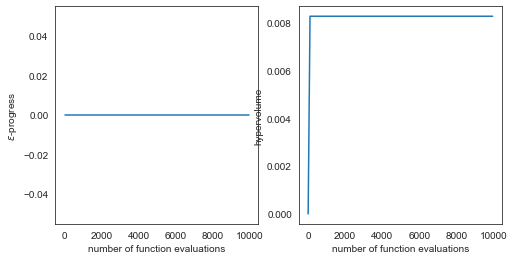

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence.nfe, convergence.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

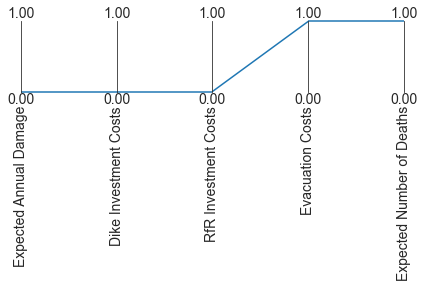

In [43]:
from ema_workbench.analysis import parcoords

data = archive.loc[:, [o.name for o in robustnes_functions]]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

This is a bit better but not much. 

Now, observe the following: you are using a domain criterion as your sole measure of robustness. That is, you look at the fraction of scenarios above or below a threshold. The costs however do not vary accross scenarios. Thus this objective can only be 0 or 1. This is not particularly useful for optimization. 

We might thus want to consider another metric for costs. Why not simply use the raw costs itself?


In [44]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

def costs(data):
    return data[0]/1e9 # makes numbers nicer
    
SMALLER = 'SMALLER'

Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1e-5) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Dike_Investment_Costs = costs
RfR_Investment_Costs = costs
Evacuation_Costs = costs
Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 6e8) #not ok


In [45]:
from ema_workbench.analysis import parcoords

experiments, outcomes = results

funcs = {"Expected Annual Damage": Expected_Annual_Damage,
         "Dike Investment Costs": Dike_Investment_Costs,
         "RfR Investment Costs": RfR_Investment_Costs,
         "Evacuation Costs": Evacuation_Costs,
         "Expected Number of Deaths": Expected_Number_of_Deaths}

total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in outcomes.items()}
    
    for k, v in temp_outcomes.items():
        score = funcs[k](v)
        scores[k] = score
    total_scores[policy] = scores

data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

KeyError: 'policy'

This already looks much nicer.

In [46]:
MAXIMIZE = ScalarOutcome.MAXIMIZE
MINIMIZE = ScalarOutcome.MINIMIZE

funcs = {"Expected Annual Damage": Expected_Annual_Damage,
         "Dike Investment Costs": Dike_Investment_Costs,
         "RfR Investment Costs": RfR_Investment_Costs,
         "Evacuation Costs": Evacuation_Costs,
         "Expected Number of Deaths": Expected_Number_of_Deaths}

robustnes_functions = [ScalarOutcome('Expected Annual Damage', kind=MINIMIZE,
                                     function=Expected_Annual_Damage),
                       ScalarOutcome('Dike Investment Costs', kind=MINIMIZE,
                                     function=Dike_Investment_Costs),
                       ScalarOutcome('RfR Investment Costs', kind=MINIMIZE,
                                     function=RfR_Investment_Costs),
                       ScalarOutcome('Evacuation Costs', kind=MINIMIZE,
                                     function=Evacuation_Costs),
                       ScalarOutcome('Expected Number of Deaths', kind=MINIMIZE,
                                     function=Expected_Number_of_Deaths)
                       ]

In [47]:
# we have to change the plausible max for total investment costs
convergence = [HyperVolume(minimum=[0,0,0,0,0], maximum=[1, 1, 1, 1, 1]),
               EpsilonProgress()]
nfe = 200
epsilons=[0.05,]*len(robustnes_functions)  #final value of epsilon should be much lower.Just for experiment purposes is 1
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.robust_optimize(robustnes_functions, scenarios, nfe=nfe,
                                                     convergence=convergence, epsilons=epsilons)
archive, convergence = results


  1%|▎                            | 100/10000 [17:56:44<1776:37:13, 646.04s/it]

100%|████████████████████████████████████████| 200/200 [02:51<00:00,  1.16it/s]
[MainProcess/INFO] optimization completed, found 3 solutions


### Save Results

In [48]:
from ema_workbench import save_results
experiment_number = 2
save_results(results, './output/optimization_moro/Optimization_Moro_id_%s.tar.gz'%experiment_number)

KeyError: 'hypervolume'

In [49]:
try:
    archive.to_csv('./output/optimization_moro/Optimization_Moro_id_%s_archive.csv'%experiment_number, index=False)
    pd.DataFrame.from_dict(convergence).to_csv('./output/optimization_moro/Optimization_Moro_id_%s_convergence.csv'%experiment_number, index=False)
except:
    print("Unable to save as csv files")

### Visualization

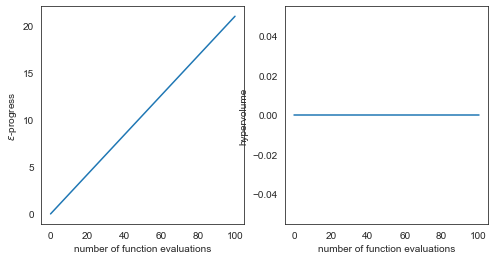

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence.nfe, convergence.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

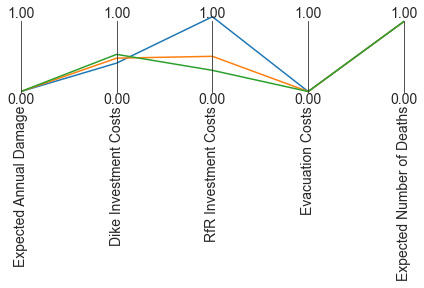

In [51]:
data = archive.loc[:, [o.name for o in robustnes_functions]]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

# 1.3 Re-evaluate candidate solutions under uncertainty

In [52]:
from ema_workbench import Policy

policies = archive.drop([o.name for o in robustnes_functions], axis=1)
policies_to_evaluate = []

for i, policy in policies.iterrows():
    policies_to_evaluate.append(Policy("moro {}".format(i), **policy.to_dict()))

In [53]:
n_scenarios = 10
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies_to_evaluate)

#start = time.time()
#end = time.time()

#print('Processing time:',(end-start)/60,'Minutes')

100%|██████████████████████████████████████████| 30/30 [00:10<00:00,  2.73it/s]


In [54]:
from ema_workbench import save_results

save_results(results, 'output\MORO_id_2_reevaluation.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\python\Documents\GitHub\MBDM\final assignment\output\MORO_id_2_reevaluation.tar.gz


In [55]:
policies.to_csv('output\moro_id_2_polices.csv')

In [56]:
import pandas as pd
experiments, outcomes = results

overall_robustness = {}
for policy in np.unique(experiments['policy']):
    policy_robustness = {}

    logical = experiments['policy'] == policy
    
    for outcome, values in outcomes.items():
        values = values[logical]
        policy_robustness[outcome] = robustness_funcs[outcome](values)
    overall_robustness[policy] = policy_robustness
overall_robustness = pd.DataFrame.from_dict(overall_robustness).T
overall_robustness

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
moro 0,0.1,0.0,0.0,0.6,0.1
moro 1,0.0,0.0,0.0,0.3,0.0
moro 2,0.0,0.0,0.0,0.1,0.0


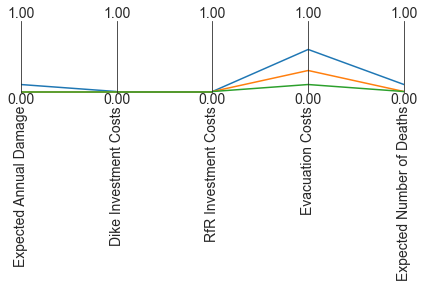

In [57]:

data = overall_robustness.loc[:,
       list(overall_robustness.columns)] #['Expected Number of Deaths', 'Expected Annual Damage', 'Total Investment Costs']]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

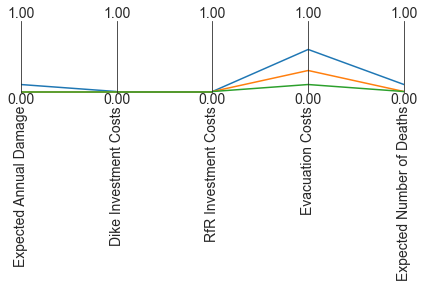

In [58]:

data = overall_robustness.loc[:,
       list(overall_robustness.columns)] #['Expected Number of Deaths', 'Expected Annual Damage', 'Total Investment Costs']]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()